In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
import re

In [4]:
columns_to_drop = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
    'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
    'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'
]
application_train = pd.read_csv('./data/application_train.csv')

application_train= application_train.drop(columns=columns_to_drop)

In [5]:
X_encoded = pd.get_dummies(application_train.drop('TARGET',axis=1), columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'], drop_first=True)

X = X_encoded.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

y = application_train.TARGET

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost 直接存取 dataframe
data_dmatrix = xgb.DMatrix(data=X,label=y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.05, random_state = 37)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 1/19, random_state = 37)

In [7]:

params = {"objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 14, 'learning_rate': 0.1,
          'max_depth': 10, 'reg_alpha' : 0, 'random_state' : 37}

pipe_xgb = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier(**params))])

t0 = time.time()

pipe_xgb.fit(X_train.values, y_train.values, 
            xgb__early_stopping_rounds=20,
            xgb__eval_set = [(X_train.values, y_train.values), (X_test.values, y_test.values)],
            xgb__eval_metric = 'error')
t1 = time.time()
y_pred = pipe_xgb.predict(X_test)
y_trainPred = pipe_xgb.predict(X_train)

print('XGBoost elapse time: {}'.format(t1-t0))

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.14870	validation_1-error:0.14848
[1]	validation_0-error:0.14197	validation_1-error:0.14503
[2]	validation_0-error:0.08197	validation_1-error:0.08442
[3]	validation_0-error:0.08195	validation_1-error:0.08442
[4]	validation_0-error:0.09377	validation_1-error:0.09781
[5]	validation_0-error:0.08935	validation_1-error:0.09235
[6]	validation_0-error:0.08870	validation_1-error:0.09131
[7]	validation_0-error:0.08133	validation_1-error:0.08416
[8]	validation_0-error:0.08256	validation_1-error:0.08552
[9]	validation_0-error:0.08132	validation_1-error:0.08435
[10]	validation_0-error:0.08128	validation_1-error:0.08422
[11]	validation_0-error:0.08068	validation_1-error:0.08331
[12]	validation_0-error:0.08069	validation_1-error:0.08331
[13]	validation_0-error:0.08066	validation_1-error:0.08331
[14]	validation_0-error:0.08066	validation_1-error:0.08331
[15]	validation_0-error:0.08067	validation_1-error:0.08331
[16]	validation_0-error:0.08065	validation_1-error:0.08331
[17]	va

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


XGBoost elapse time: 20.570605993270874


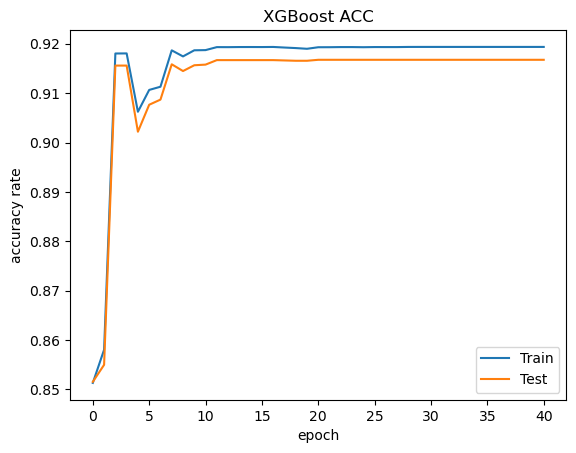

In [8]:
# from sklearn.metrics import accuracy_score

# y_pred = pipe_xgb.predict(X_test)
# print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

results = pipe_xgb.named_steps["xgb"].evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
acc = [np.abs(x - 1) for x in results['validation_0']['error']]
acc2 = [np.abs(x - 1) for x in results['validation_1']['error']]
fig, ax = plt.subplots()
ax.plot(x_axis, acc, label='Train')
ax.plot(x_axis, acc2, label='Test')
ax.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy rate')
plt.title('XGBoost ACC')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_xgb,
                        X = X_train,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1)

print('CV accuracy: %.3f +/- %.3f'% ((np.mean(scores)) , np.std(scores)))

KeyboardInterrupt: 

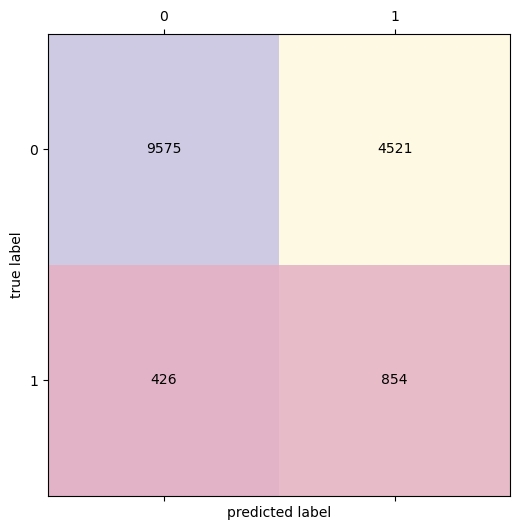

In [15]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(confmat, cmap = 'Spectral', alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i,j],
                va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     14096
           1       0.16      0.67      0.26      1280

    accuracy                           0.68     15376
   macro avg       0.56      0.67      0.53     15376
weighted avg       0.89      0.68      0.75     15376



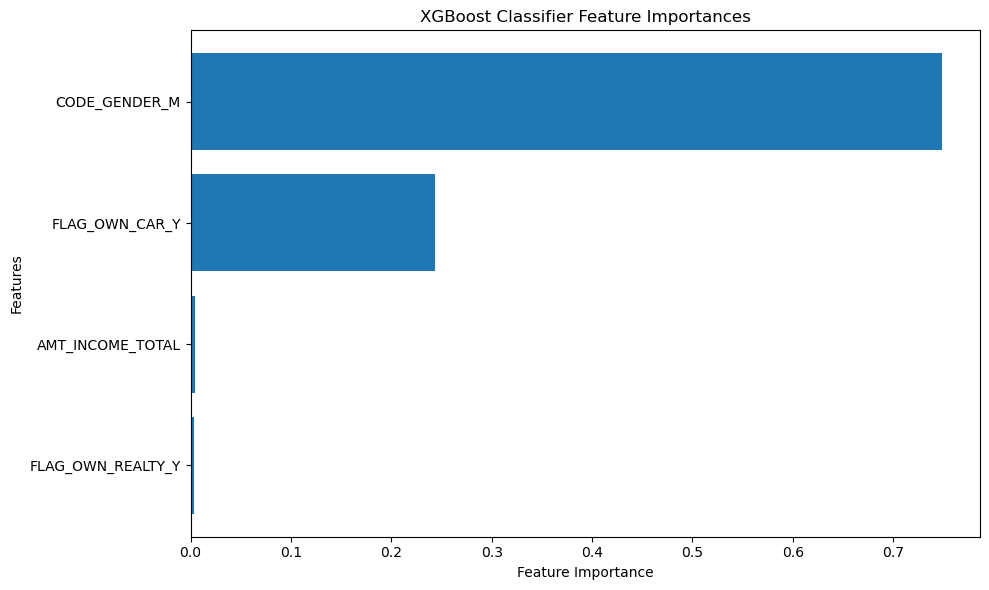

In [34]:
feature_importances = pipe_xgb.steps[1][1].feature_importances_

# Get feature names from the pipeline
feature_names = X_train.columns

# Sort feature importances in ascending order
sorted_indices = np.argsort(feature_importances)[::1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

important_indices = np.where(sorted_feature_importances != 0)[0]
important_feature_importances = sorted_feature_importances[important_indices]
important_feature_names = sorted_feature_names[important_indices]
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(important_feature_importances)), important_feature_importances, tick_label=important_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Classifier Feature Importances')
plt.tight_layout()
plt.show()

In [35]:
import joblib 

# save model with joblib 
filename = 'xgb_clf.sav'
joblib.dump(pipe_xgb, './model/'+filename)

['./model/xgb_clf.sav']

In [40]:
# load model with joblib
loaded_model = joblib.load('./model/'+filename)

# evaluate model 
data = {
    "AMT_INCOME_TOTAL": [600],
    "CODE_GENDER_M": [0],
    "CODE_GENDER_XNA" : [0],
    "FLAG_OWN_CAR_Y": [0],
    "FLAG_OWN_REALTY_Y": [0]
}
data = pd.DataFrame(data)
y_pred = loaded_model.predict_proba(data)

# check results
print(y_pred[0][0])

0.48623538


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [18]:
# import pickle
# file_name = "xgb_clf.pkl"

# # save
# pickle.dump(pipe_xgb, open(file_name, "wb"))

In [19]:
## 給顥瑋哥的測試版模型
# import pickle
# import pandas as pd
# file_name = "test.pkl"

# # # save
# # pickle.dump(pipe_xgb, open(file_name, "wb"))

# # load
# xgb_model_loaded = pickle.load(open('./model/'+file_name, "rb"))

# # test
# data = {
#     "AMT_INCOME_TOTAL": [600],
#     "CODE_GENDER_M": [0],
#     "CODE_GENDER_XNA" : [0],
#     "FLAG_OWN_CAR_Y": [0],
#     "FLAG_OWN_REALTY_Y": [0]
# }
# data = pd.DataFrame(data)
# print(xgb_model_loaded.predict_proba(data)[0][0]) # 不違約 (0) 的機率 0.9